## HW1 - Basics of ML
Include your code in the relevant cells below.
Subparts labeled as questions (Q1.1, Q1.2, etc.) should have their answers filled in or plots placed prominently, as appropriate.

#### Important notes:

1. On this and future homeworks, depending on the data size and your hardware configuration, experiments may take too long if you use the complete dataset. This may be challenging, as you may need to run multiple experiments. So, if an experiment takes too much time, start first with a smaller sample that will allow you to run your code within a reasonable time. Once you complete all tasks, before the final submission, you can allow longer run times and run your code with the complete set. However, if this is still taking too much time or causing your computer to freeze, it will be OK to submit experiments using a sample size that is feasible for your setting (indicate it clearly in your submission). Grading of the homework will not be affected from this type of variations in the design of your experiments.


2. You can switch between 2D image data and 1D vector data using the numpy functions flatten() and resize()

### S1: Filtering the data
- Load MNIST FASHION dataset (hint: use the practice notebook)
- Select a training set with the first n=100 samples from each category
- Select a testing set with the first n=100 samples from each category
- Create a numpy matrix named mat_avg defined as:
  A 10 x 2 matrix with the average intensity of all images in each category for the training and testing sets (rows: 10 categories, columns: average intensity in train set,  average intensity in test set)

Q1.1: Which category has the largest average intensity value in training data:   2

Q1.2: Which category has the largest average intensity value in testing data:   4

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

/var/folders/91/fw6j_j153bv0ybx1rzlkpy2r0000gn/T/ipykernel_16634/2080034654.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
import tensorflow as tf
mnist = tf.keras.datasets.fashion_mnist
(X_tr, Y_tr), (X_te, Y_te) = mnist.load_data()

In [3]:
# Select a training/testing set with the first n=100 samples from each category

X_tr_samples = np.zeros((1000, 28, 28))
Y_tr_samples = np.zeros((1000))
for i in range(10):
  X_tr_samples[i*100:(i+1)*100] = X_tr[Y_tr == i][:100]
  Y_tr_samples[i*100:(i+1)*100] = Y_tr[Y_tr == i][:100]

X_te_samples = np.zeros((1000, 28, 28))
Y_te_samples = np.zeros((1000))
for i in range(10):
  X_te_samples[i*100:(i+1)*100] = X_te[Y_te == i][:100]
  Y_te_samples[i*100:(i+1)*100] = Y_te[Y_te == i][:100]

In [4]:
# Create a numpy matrix named mat_avg
mat_avg = np.zeros((10,2))

for i in range(10):
  mat_avg[i,0] = np.mean(X_tr_samples[Y_tr_samples == i])
  mat_avg[i,1] = np.mean(X_te_samples[Y_te_samples == i])

# Q1.1: Which category has the largest average intensity value in training data:   ___
print(np.argmax(mat_avg[:,0]))

# Q1.2: Which category has the largest average intensity value in testing data:   ___
print(np.argmax(mat_avg[:,1]))


2
4


### S2: Finding the average image
- Find and display a single average image of all shoes (categories 'Sandal', 'Sneaker', 'Ankle boot') in training and testing data (use the smaller sample you created)

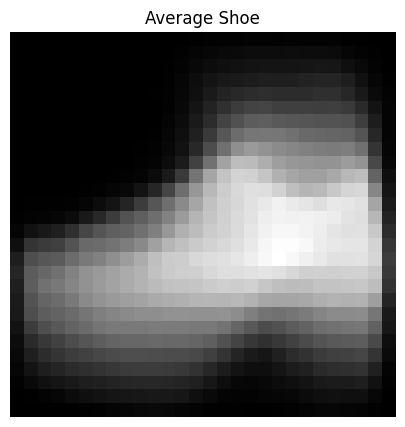

In [77]:
# Select shoes from training and testing data
X_tr_shoes_ind = np.where((Y_tr_samples == 5) | (Y_tr_samples == 7) | (Y_tr_samples == 9))[0]
X_te_shoes_ind = np.where((Y_te_samples == 5) | (Y_te_samples == 7) | (Y_te_samples == 9))[0]

X_tr_shoes_img = X_tr_samples[X_tr_shoes_ind, :, :]
X_te_shoes_img = X_te_samples[X_te_shoes_ind, :, :]

combined_shoes = np.concatenate((X_tr_shoes_img, X_te_shoes_img))

# Calculate the average image for training and testing shoes
avg_shoe = np.mean(combined_shoes, axis=0)

# Display the average images
plt.figure(figsize=(10, 5))
plt.title("Average Shoe")
plt.imshow(avg_shoe, cmap="gray")
plt.axis("off")

plt.show()


### S3: Image distances
In the training set, find the shoe image that is most dissimilar from the mean shoe image. Show it as a 2D image
In the training set, find the shoe image that is most similar from the mean shoe image. Show it as a 2D image
Do the same for the testing set
Hint: You can use the "euclidean distance" as your similarity metric. Given that an image i is represented with a flattened feature vector v_i , and the second image j with v_m, the distance between these two images can be calculated using the vector norm of their differences ( | v_i - v_j | )

Q3.1: What is the index of most similar shoe image in the training set: 789

Q3.2: What is the index of most dissimilar shoe image in the training set: 936

Q3.1: What is the index of most dissimilar shoe image in the testing set: 957


In [78]:
## Find pixelwise "distance" of each image to the mean image
vec_mean = avg_shoe.flatten()
arr_d = np.zeros(X_tr_shoes_ind.shape[0])

for i, ind_sel in enumerate(X_tr_shoes_ind):
  img_sel = X_tr_samples[ind_sel, :, :].flatten()
  d_sel = np.linalg.norm(img_sel - vec_mean)
  arr_d[i] = d_sel

ind_similar = X_tr_shoes_ind[arr_d.argmin()]
ind_dissimilar = X_tr_shoes_ind[arr_d.argmax()]

In [79]:
ind_similar

789

In [80]:
ind_dissimilar

936

In [81]:
# testing set:
vec_mean = avg_shoe.flatten()
arr_d = np.zeros(X_te_shoes_ind.shape[0])

for i, ind_sel in enumerate(X_te_shoes_ind):
  img_sel = X_te_samples[ind_sel, :, :].flatten()
  d_sel = np.linalg.norm(img_sel - vec_mean)
  arr_d[i] = d_sel

ind_dissimilar = X_te_shoes_ind[arr_d.argmax()]


In [82]:
ind_dissimilar

957

### S4: Train a classifier to differentiate shoes from no-shoes
- Create new labels for train and test images as shoes (1) or no-shoes (0)
- Train 2 different classifiers on the training set (SVM and Random Forest). Apply the classifiers on the testing data
- Display the confusion matrix of each classifier
- Display 4 images that are mis-classified as shoes by each classifier

Q1.1: What is the testing accuracy of each classifier:  
Accuracy of SVM classifier:  0.9968.
Accuracy of the Random Forest classifier: 0.9988

Q1.2: What is the category (original label) that is most frequently mis-classified as a shoe:   8

Q1.3: What is the category (original label) that is most frequently mis-classified as a non-shoe:  5


In [83]:
## Replace labels
#Y_tr_samples[(Y_tr_samples != 5) | (Y_tr_samples !=7) | (Y_tr_samples != 9)] = 0
#Y_tr_samples[(Y_tr_samples == 5) | (Y_tr_samples ==7) | (Y_tr_samples == 9)] = 1
#Y_te_samples[(Y_te_samples != 5) | (Y_te_samples !=7) | (Y_te_samples != 9)] = 0
#Y_te_samples[(Y_te_samples == 5) | (Y_te_samples ==7) | (Y_te_samples == 9)] = 1

from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix

# Create new labels for train and test images as shoes (1) or no-shoes (0)
# Y_tr = np.where((Y_tr == 5) | (Y_tr == 7) | (Y_tr == 9), 1, 0)
# Y_te = np.where((Y_te == 5) | (Y_te == 7) | (Y_te == 9), 1, 0)

# Create new labels for train and test images
Y_tr_new = np.array([])
for label in Y_tr:
    if label == 5 or label == 7 or label == 9:
        Y_tr_new = np.append(Y_tr_new, 1)
    else:
        Y_tr_new = np.append(Y_tr_new, 0)

Y_te_new = np.array([])
for label in Y_te:
    if label == 5 or label == 7 or label == 9:
        Y_te_new = np.append(Y_te_new, 1)
    else:
        Y_te_new = np.append(Y_te_new, 0)

## Flatten images
X_tr = X_tr.reshape(X_tr.shape[0], -1)
X_te = X_te.reshape(X_te.shape[0], -1)

# Create the svm classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

# Train the model
clf.fit(X_tr, Y_tr_new)

# Train Random Forest classifier
clf_rf = RandomForestClassifier()
clf_rf.fit(X_tr, Y_tr_new)

# Predict the label
y_pred_svm = clf.predict(X_te)
y_pred_rf = clf_rf.predict(X_te)




In [84]:
print(Y_tr_new.shape)

(60000,)


In [85]:
Y_tr_new

array([1., 0., 0., ..., 0., 0., 1.])

In [86]:
from sklearn import metrics
print('Accuracy of SVM classifier: ', metrics.accuracy_score(Y_te_new, y_pred_svm))

print("Accuracy of the Random Forest classifier:", accuracy_score(Y_te_new, y_pred_rf))


Accuracy of SVM classifier:  0.9968
Accuracy of the Random Forest classifier: 0.9989


SVM Confusion Matrix:
[[6979   21]
 [  11 2989]]

Random Forest Confusion Matrix:
[[6994    6]
 [   5 2995]]


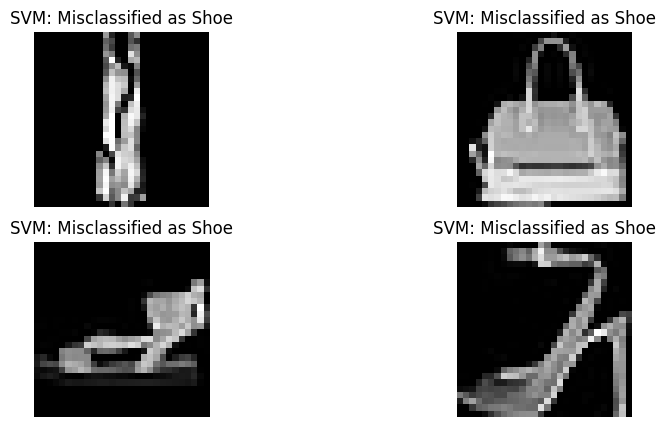

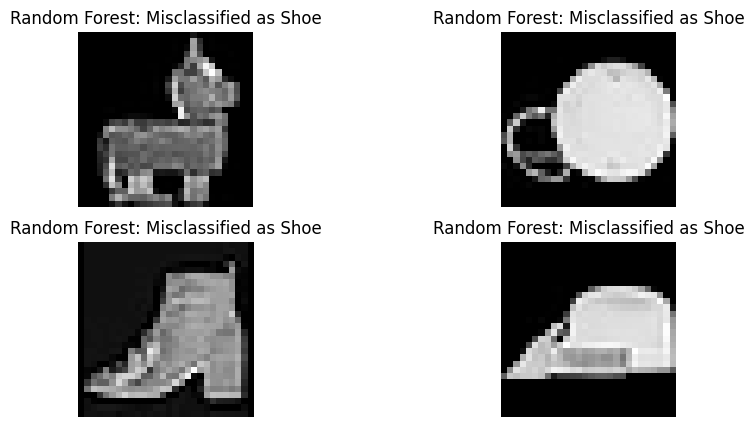

In [87]:
# Calculate confusion matrices
cm_svm = confusion_matrix(Y_te_new, y_pred_svm)
cm_rf = confusion_matrix(Y_te_new, y_pred_rf)

# Display confusion matrices
print("SVM Confusion Matrix:")
print(cm_svm)
print("\nRandom Forest Confusion Matrix:")
print(cm_rf)

# Find misclassified images for each classifier
misclassified_svm = np.where(y_pred_svm != Y_te_new)[0]
misclassified_rf = np.where(y_pred_rf != Y_te_new)[0]

# Display misclassified images for SVM
plt.figure(figsize=(10, 5))
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(X_te[misclassified_svm[i]].reshape(28, 28), cmap='gray')
    plt.title("SVM: Misclassified as Shoe")
    plt.axis('off')
plt.show()

# Display misclassified images for Random Forest
plt.figure(figsize=(10, 5))
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(X_te[misclassified_rf[i]].reshape(28, 28), cmap='gray')
    plt.title("Random Forest: Misclassified as Shoe")
    plt.axis('off')
plt.show()

In [88]:
fp_indices = np.where(np.logical_and(Y_te_new == 0, y_pred_svm == 1))[0]

fp = Y_te[fp_indices]

In [89]:
fp

array([3, 8, 8, 8, 2, 8, 8, 8, 8, 8, 8, 0, 8, 8, 8, 2, 8, 8, 8, 8, 8],
      dtype=uint8)

In [90]:
fn_indices = np.where(np.logical_and(Y_te_new == 1, y_pred_svm == 0))[0]

fn = Y_te[fn_indices]

In [91]:
fn

array([5, 5, 9, 5, 5, 5, 9, 5, 5, 9, 5], dtype=uint8)

In [92]:
fp_indices = np.where(np.logical_and(Y_te_new == 0, y_pred_rf == 1))[0]

fp = Y_te[fp_indices]

In [93]:
fp

array([8, 8, 8, 8, 8, 8], dtype=uint8)

In [94]:
fn_indices = np.where(np.logical_and(Y_te_new == 1, y_pred_rf == 0))[0]

fn = Y_te[fn_indices]

In [95]:
fn

array([9, 5, 9, 5, 5], dtype=uint8)

### Bonus:

- In question S4 you have a chance to discard one of image categories that are part of the non-shoe set. Which category would you prefer to discard? Explain and justify with data

I prefer to discard category 8, as it consist the majority of the false positives.
